In [1]:
import pandas as pd 
import numpy as np 
from dtw import *
import gower
import pyclustering

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
df = pd.read_csv("/home/nils/projects/research_project_frequency_analysis/lcs_analysis/5314-201703.encoded.csv")
df.columns = ["timestamps", "events"]

day1 = df[df.timestamps < df.timestamps[0] + pd.to_timedelta("1d").total_seconds()]
subset = df[df.timestamps < df.timestamps[0] + pd.to_timedelta("7d").total_seconds()]


In [3]:
delta_ts = (-df.timestamps[:].reset_index() + df.timestamps[1:].reset_index()).timestamps[:-1]
df["delta_ts"] = delta_ts
df

timestamps    events  delta_ts
0      1488322801  85f5c18b       0.0
1      1488322801  85f5c18b       1.0
2      1488322802  70083fd2      59.0
3      1488322861  85f5c18b       0.0
4      1488322861  276ebc63       0.0
...           ...       ...       ...
52447  1490997301  85f5c18b     272.0
52448  1490997573  760c5208       0.0
52449  1490997573  bba3d47c       0.0
52450  1490997573  f9cfa0b9       0.0
52451  1490997573  ed9738ca       NaN

[52452 rows x 3 columns]

In [4]:
events = {e: i for i, e in enumerate(df.events.unique())}
df["discrete_events"] = df.events.map(events)
df["metric"] = list(zip(df.discrete_events, df.delta_ts))
print(f"unique events: {len(events)}")
df

unique events: 457


timestamps    events  delta_ts  discrete_events      metric
0      1488322801  85f5c18b       0.0                0    (0, 0.0)
1      1488322801  85f5c18b       1.0                0    (0, 1.0)
2      1488322802  70083fd2      59.0                1   (1, 59.0)
3      1488322861  85f5c18b       0.0                0    (0, 0.0)
4      1488322861  276ebc63       0.0                2    (2, 0.0)
...           ...       ...       ...              ...         ...
52447  1490997301  85f5c18b     272.0                0  (0, 272.0)
52448  1490997573  760c5208       0.0                7    (7, 0.0)
52449  1490997573  bba3d47c       0.0                8    (8, 0.0)
52450  1490997573  f9cfa0b9       0.0                9    (9, 0.0)
52451  1490997573  ed9738ca       NaN               10   (10, nan)

[52452 rows x 5 columns]

In [5]:
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.rock import rock

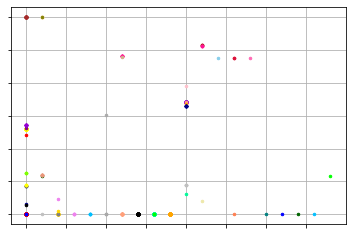

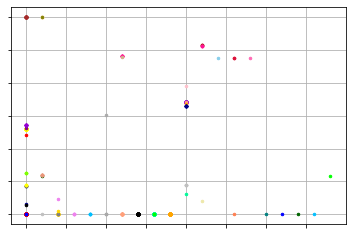

In [11]:
rock_instance = rock(df.metric[:500], 1.0, 5)
 
# Run cluster analysis.
rock_instance.process()
 
# Obtain results of clustering.
clusters = rock_instance.get_clusters()
 
# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df.metric[:500])
visualizer.show()

In [8]:
df.metric[:100]

0        (0, 0.0)
1        (0, 1.0)
2       (1, 59.0)
3        (0, 0.0)
4        (2, 0.0)
         ...     
95       (8, 0.0)
96       (9, 0.0)
97    (10, 169.0)
98       (0, 0.0)
99       (0, 0.0)
Name: metric, Length: 100, dtype: object